In [ ]:
import requests
from lxml import html
from bs4 import BeautifulSoup as bs
from typing import Dict, List
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
url = 'https://m.vk.com/miem_hse?act=links'
html = requests.get(url).text

In [ ]:
parsed = bs(html, 'html.parser')

In [ ]:
list_of_groups = list()

In [ ]:
for a in parsed.find_all('a', attrs={'class': 'simple_item'}, href = True):
    ssyl = a['href']
    if 'away.php' not in ssyl:
        if ssyl not in list_of_groups:
            list_of_groups.append(ssyl) 

In [ ]:
def get_title(ssylka):
    title_soup = bs(requests.get('https://m.vk.com/{}'.format(ssylka)).text)
    return (title_soup.find_all('h2')[0].get_text())

In [ ]:
for i in range(3):
    
    old_list = list(list_of_groups)

    for agroup in old_list:
        souped_refs = bs(requests.get('https://m.vk.com/{}?act=links'.format(agroup)).text)
        for a_refs in souped_refs.find_all('a', attrs={'class': 'simple_item'}, href = True):
            link = a_refs['href']
            #print(link)
            if 'away.php' not in link and 'wall' not in link :
                if link not in list_of_groups:
                    try:
                        list_of_groups.append(link)
                    except IndexError:
                        continue



KeyboardInterrupt: ignored

In [ ]:
len(list_of_groups)

483

In [ ]:
dict_of_groups = {}

for agroup in list_of_groups:
    
    try:
        a_title = get_title(agroup)
    except IndexError:
        continue
    dict_of_groups[a_title] = []

    souped_refs = bs(requests.get('https://m.vk.com/{}?act=links'.format(agroup)).text)
    for a_refs in souped_refs.find_all('a', attrs={'class': 'simple_item'}, href = True):
        link = a_refs['href']
        #print(link)
        if 'away.php' not in link and 'wall' not in link :
            if link not in dict_of_groups[a_title]:
                try:
                    dict_of_groups[a_title].append([get_title(link), link])
                except IndexError:
                    continue


In [ ]:
for x, y in dict_of_groups.items():
  for z in y:
    if x == z[0]:
      y.remove(z)

In [ ]:
dict_of_groups.pop('МИЭМ НИУ ВШЭ', None)

[['Физико-математическая школа МИЭМ НИУ ВШЭ', '/fmsh_hse'],
 ['Студия «Журналист» НИУ ВШЭ', '/journalist_miem'],
 ['Математическое моделирование сложных систем', '/club211850369'],
 ['Студенческий совет МИЭМ НИУ ВШЭ', '/studsovet_miem'],
 ['Хочу в МИЭМ НИУ ВШЭ', '/ba_miem_hse'],
 ['Подкаст "Битый час"', '/bch_podcast'],
 ['HSE.Travel', '/hse.travel'],
 ['Movement', '/movement_hse?_smt=groups_list%3A1'],
 ['MIEM TV', '/miemtv'],
 ['Корпоративная защита от внутренних угроз', '/iswsr'],
 ['Комитет по цифровизации СС НИУ ВШЭ', '/hse_digital'],
 ['Высшая школа экономики', '/hse_university'],
 ['Матинфо Лицей НИУ ВШЭ', '/matinfo_lyceum_hse'],
 ['STUDLIFE HSE', '/studlife_hse'],
 ['HSE Career | Центр развития карьеры ВШЭ', '/hse_career'],
 ['ДЭИ МИЭМ им. А.Н. Тихонова НИУ ВШЭ', '/deimiemhse'],
 ['"Интернет вещей" Магистратура ВШЭ', '/club161942852'],
 ['miem3d', '/miem3d'],
 ['Студенческий совет НИУ ВШЭ', '/hsecouncil'],
 ['HSE Student Sport Club', '/hsessc'],
 ['Типичная Вышка', '/thatssohse

In [ ]:
def generate_edges(graph):
    edges = []

    # for each node in graph
    for node in graph:

        # for each neighbour node of a single node
        for neighbour in graph[node]:
            # if edge exists then append
            edges.append((node, neighbour[0]))
    return edges

In [ ]:
edges_groups = generate_edges(dict_of_groups)

In [ ]:
G = nx.DiGraph(edges_groups)

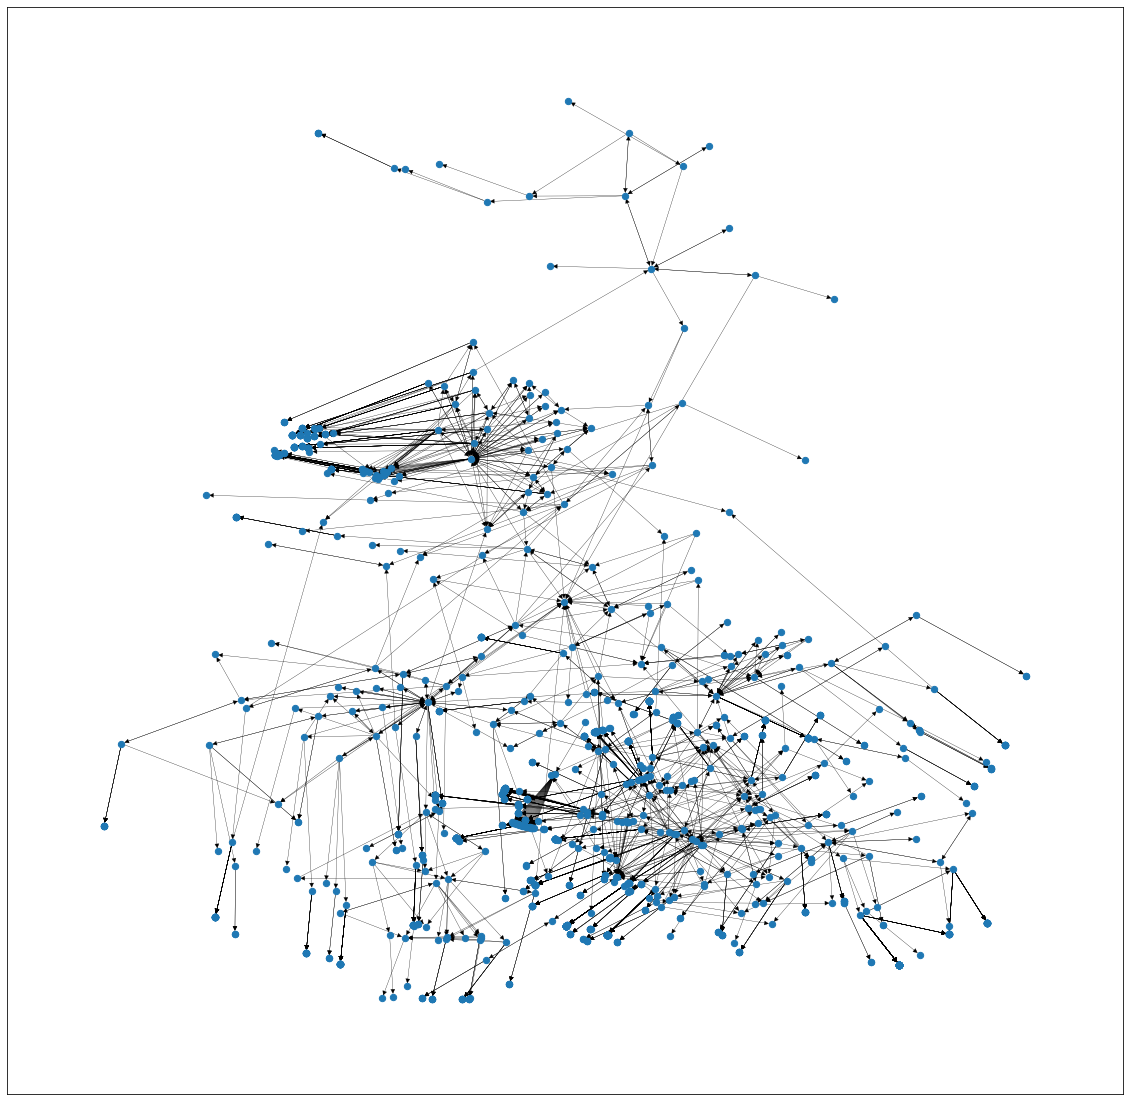

In [ ]:
plt.figure(figsize=(20, 20))
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, with_labels = False, node_size = 40, width = 0.3, pos = layout)

In [ ]:
for node in G.nodes:
  print(nx.get_node_attributes(G, node))

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{

In [ ]:
print(nx.info(G))

DiGraph with 1320 nodes and 1757 edges


In [ ]:
print(nx.is_strongly_connected(G))
print(nx.is_weakly_connected(G))
print(nx.is_attracting_component(G))
print(nx.is_semiconnected(G))

False
False
False
False


In [ ]:
loc_clust = nx.clustering(G)

In [ ]:
print(nx.average_clustering(G))

0.06421263402736117


In [ ]:
loc_clust = nx.clustering(G)
normalize = plt.Normalize(0, max(loc_clust.values()))


Text(0, 0.5, 'Frequency')

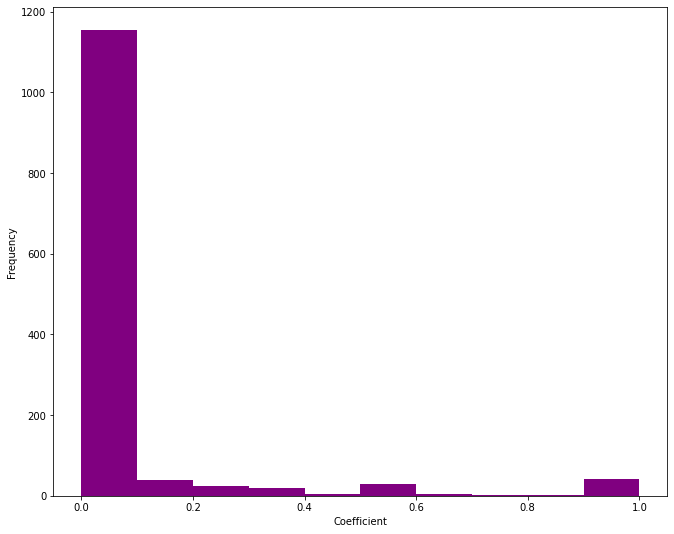

In [ ]:
plt.figure(figsize=(11, 9))
plt.hist(loc_clust.values(), bins = 10, color = 'purple')
plt.xlabel('Coefficient')
plt.ylabel('Frequency')

In [ ]:
nx.diameter(G)

NetworkXError: ignored

In [ ]:
nx.average_shortest_path_length(G)

NetworkXError: ignored

In [ ]:
av_path_dict = dict()
for source in G:
  q = 0
  s = 0
  for target in G:
    try:
      s += nx.shortest_path_length(G, source, target)
      q += 1
    except:
      continue
  av_path_dict[source] = s/q

normalize_path = plt.Normalize(0, max(av_path_dict.values()))


In [ ]:
normalize_path = plt.Normalize(0, max(av_path_dict.values()))
plt.figure(figsize=(20, 6))
plt.hist(av_path_dict.values(), bins = 40)
plt.xlabel('Average path length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

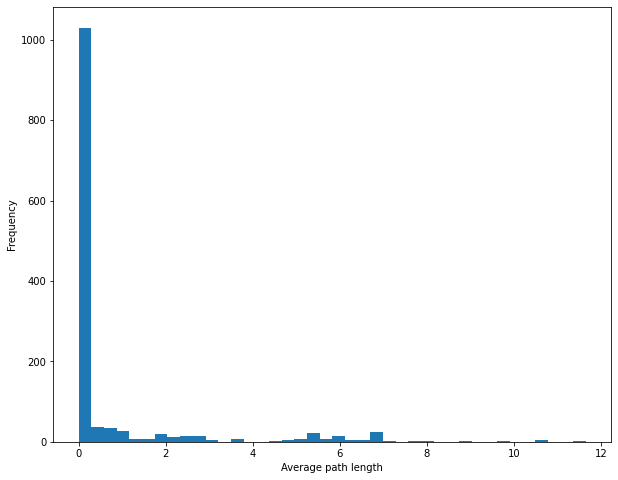

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(av_path_dict.values(), bins = 40)
plt.xlabel('Average path length')
plt.ylabel('Frequency')

In [ ]:
def centralities(G: nx.Graph) -> Dict[str, np.array]:
    cent = {}
    cent = {
        'degree': np.array(list(nx.degree_centrality(G).values())),
        'closeness': np.array(list(nx.closeness_centrality(G).values())),
        'betweenness': np.array(list(nx.betweenness_centrality(G).values()))
    }
    return cent

In [ ]:
c = centralities(G)


In [ ]:
def top10_centralities(G: nx.Graph) -> Dict[str, pd.DataFrame]:
    degree_cent = nx.degree_centrality(G)
    closeness_cent = nx.closeness_centrality(G)
    betweenness_cent = nx.betweenness_centrality(G)
    gruppa = []
    degree_centrality = []
    closeness_centrality = []
    betweenness_centrality = []
    for node in G.nodes:
        gruppa.append(node)
        degree_centrality.append(degree_cent[node])
        closeness_centrality.append(closeness_cent[node])
        betweenness_centrality.append(betweenness_cent[node])
    df_degree_cent = pd.DataFrame(
        {'public': gruppa, 'centrality': degree_centrality}
    ).sort_values(by='centrality', ascending=False).head(10)
    df_closeness_cent = pd.DataFrame(
        {'public': gruppa, 'centrality': closeness_centrality}
    ).sort_values(by='centrality', ascending=False).head(10)
    df_betweenness_cent = pd.DataFrame(
        {'public': gruppa,'centrality': betweenness_centrality}
    ).sort_values(by='centrality', ascending=False).head(10)
    top10 = {
        'degree': df_degree_cent,
        'closeness': df_closeness_cent,
        'betweenness': df_betweenness_cent
    }
    return top10

In [ ]:
tops = top10_centralities(G)

In [ ]:
tops['betweenness']

,public,centrality
119,Питерская Вышка | НИУ ВШЭ — Санкт-Петербург,0.021141
21,Лицей НИУ ВШЭ,0.019167
8,Студенческий совет НИУ ВШЭ,0.018207
10,Хочу в НИУ ВШЭ,0.013715
353,"Лаборатория ""Социология образования и науки""",0.010172
68,Аспирантура НИУ ВШЭ,0.008765
20,Матинфо Лицей НИУ ВШЭ,0.008523
83,Совет лицеистов НИУ ВШЭ,0.008074
27,Olimpiada.ru,0.006524
106,"Олимпиада ""Музеи. Парки. Усадьбы""",0.006399


In [ ]:
ev_centrality = nx.eigenvector_centrality(G)
top_ev = sorted(ev_centrality, key=ev_centrality.get, reverse=True)[:10]
for public in top_ev:
  print(public)

Питерская Вышка | НИУ ВШЭ — Санкт-Петербург
Магистратура НИУ ВШЭ — Санкт-Петербург
Центр молодежных исследований НИУ ВШЭ — СПб
Современный социальный анализ
Абитуриент НИУ ВШЭ — Санкт-Петербург
Лаборатория "Социология образования и науки"
Вышка Lite SPb
Школа социальных наук и востоковедения ВШЭ СПб
Сравнительная политика Евразии в питерской Вышке
HSE.SPB.Career | Центр развития Карьеры ВШЭ СПб


In [ ]:
katz_centrality = nx.katz_centrality(G)
top_katz = sorted(katz_centrality, key=katz_centrality.get, reverse=True)[:10]
for public in top_katz:
  print(public)

Питерская Вышка | НИУ ВШЭ — Санкт-Петербург
Студенческий совет НИУ ВШЭ
Высшая школа экономики
Лицей НИУ ВШЭ
WorldSkills Russia
Магистратура НИУ ВШЭ — Санкт-Петербург
Студсовет Питерской Вышки
Хочу в Лицей НИУ ВШЭ
Центр молодежных исследований НИУ ВШЭ — СПб
Министерство просвещения Российской Федерации


In [ ]:
pagerank = nx.pagerank(G)
top_pr = sorted(pagerank, key=pagerank.get, reverse=True)[:10]
for public in top_pr:
  print(public)

WorldSkills Russia Ульяновск
WorldSkills Russia
Студенческий совет НИУ ВШЭ
Питерская Вышка | НИУ ВШЭ — Санкт-Петербург
Лицей НИУ ВШЭ
Высшая школа экономики
Институт развития образования Ульяновск
Keystone
Keystone St.Petersburg
Яндекс


In [ ]:
hits = nx.hits(G)
top_hit1 = sorted(hits[0], key=hits[0].get, reverse=True)[:10]
for public in top_hit1:
  print(public)

Департамент культуры города Москвы
Парки Москвы
Олимпиада "Музеи. Парки. Усадьбы"
Белгородский политехнический колледж
Череповецкое училище искусств им. В.В.Верещагина
Аспирантура  НИУ ВШЭ
Фонд «Будущие Лидеры»
Департамент образования Вологодской области
Министерство образования и науки Самарской обл
Северный ворон | ССК НИУ ВШЭ СПб


In [ ]:
core = nx.k_core(G)

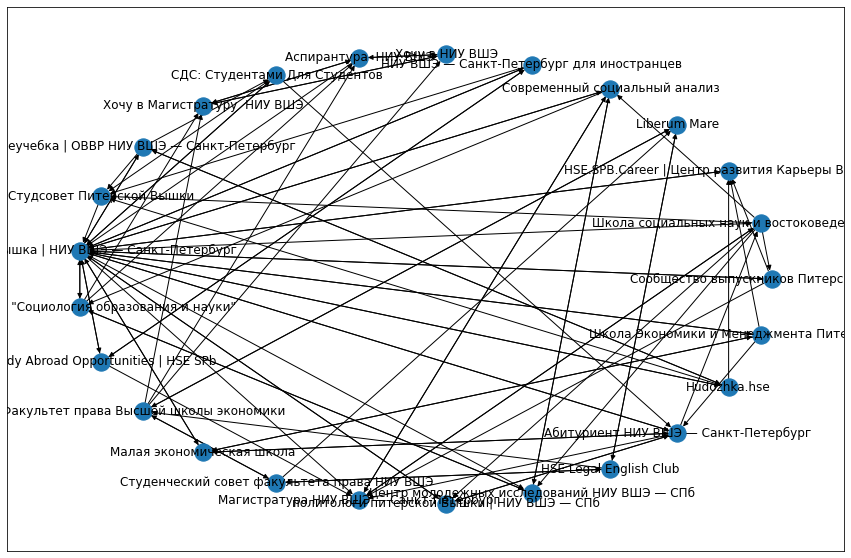

In [ ]:
plt.figure(figsize=(15, 10))
layout = nx.circular_layout(core)
nx.draw_networkx(core, pos = layout)

In [ ]:
#girwan newman
gn_communities = nx.algorithms.community.centrality.girvan_newman(G)

In [ ]:
gn_communities_list = [i for i in gn_communities]

In [ ]:
type(gn_communities_list)

list

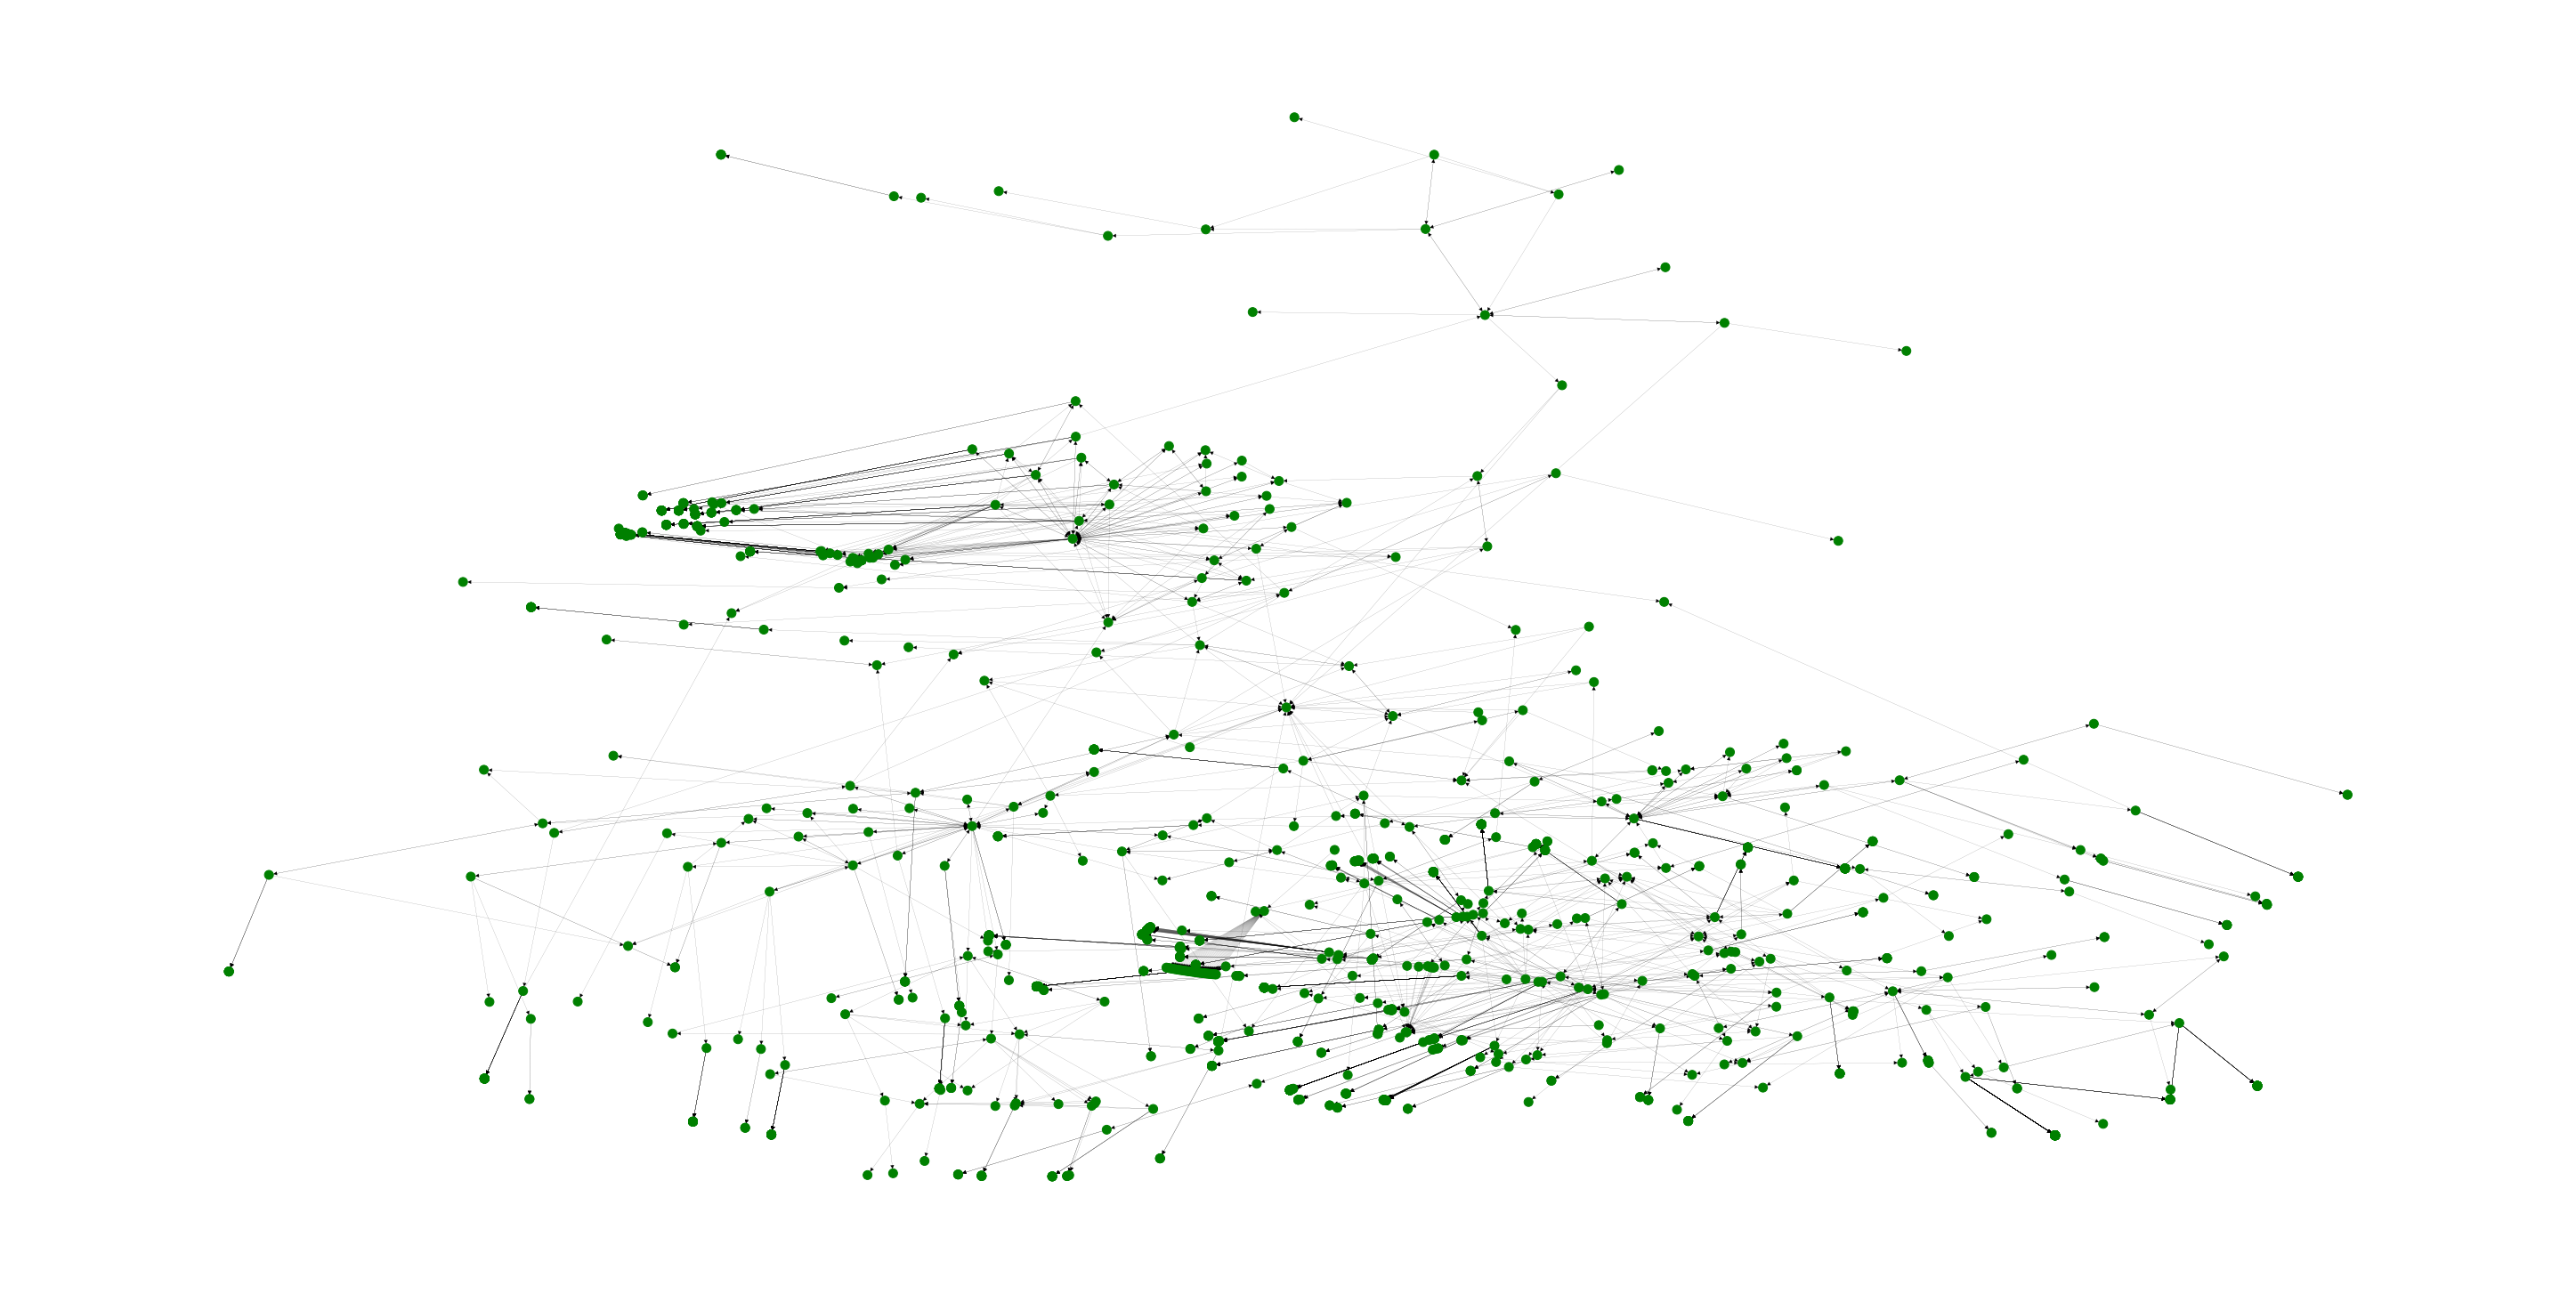

In [ ]:
color_map = []
for node in G:
    if node in gn_communities_list[0]:
        color_map.append('red')
    else:
        color_map.append('green')

plt.figure(figsize=(40, 20))
layout = nx.kamada_kawai_layout(G)
nx.draw(G, node_color=color_map, with_labels=False,  node_size = 100, pos = layout, width = 0.1)
plt.show()

In [ ]:
from community import community_louvain

In [ ]:
lp_communities = community_louvain.best_partition(nx.to_undirected(G))

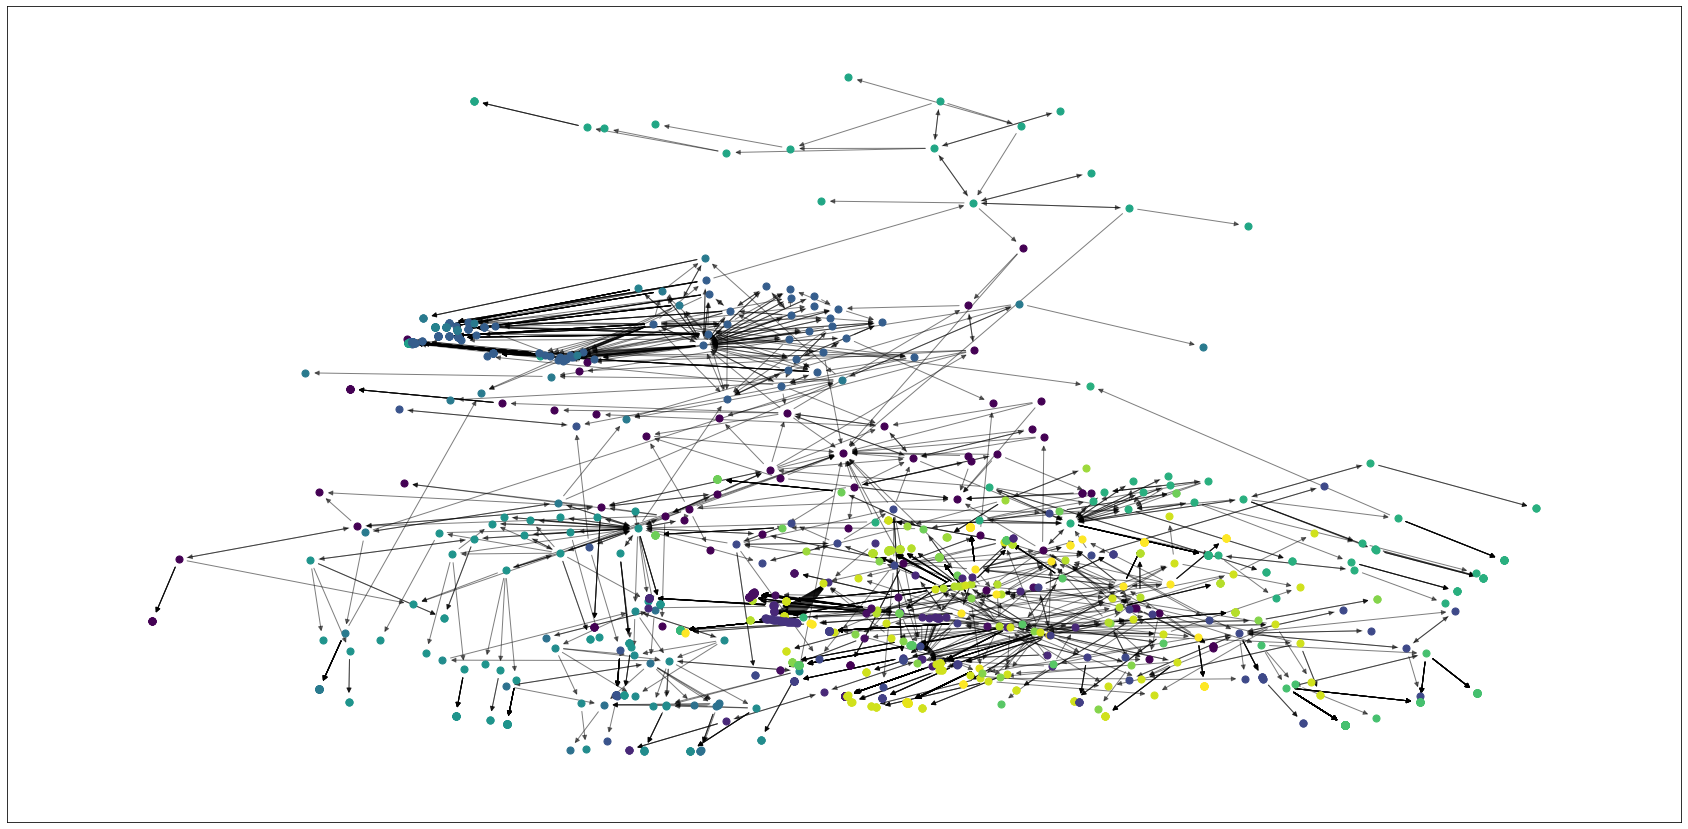

In [ ]:
cmap = cm.get_cmap('viridis', max(lp_communities.values()) + 1)

plt.figure(figsize=(30,15))
# draw the graph
layout = nx.kamada_kawai_layout(G)
pos = layout
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(lp_communities.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in lp_communities.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=50,
                           node_color=[cmap.colors[color]])